## Type Stability of Composition

In [4]:
f(x) = x

g(x) = x^2

h = f ∘ g 


function compose(f, g)
    function(x)
        return f(g(x))
    end
end

h2 = compose(f, g)

h3 = h ∘ h2

x = rand()
@code_warntype f(x)
@code_warntype g(x)
@code_warntype h(x)
@code_warntype h2(x)
@code_warntype h3(x)



Variables
  #self#::Core.Compiler.Const(f, false)
  x::Float64

Body::Float64
1 ─     return x
Variables
  #self#::Core.Compiler.Const(g, false)
  x::Float64

Body::Float64
1 ─ %1 = Core.apply_type(Base.Val, 2)::Core.Compiler.Const(Val{2}, false)
│   %2 = (%1)()::Core.Compiler.Const(Val{2}(), false)
│   %3 = Base.literal_pow(Main.:^, x, %2)::Float64
└──      return %3
Variables
  #self#::Core.Compiler.Const(Base.var"#62#63"{typeof(f),typeof(g)}(f, g), false)
  x::Tuple{Float64}

Body::Float64
1 ─ %1 = Core.getfield(#self#, :f)::Core.Compiler.Const(f, false)
│   %2 = Core.getfield(#self#, :g)::Core.Compiler.Const(g, false)
│   %3 = Core._apply_iterate(Base.iterate, %2, x)::Float64
│   %4 = (%1)(%3)::Float64
└──      return %4
Variables
  #self#::Core.Compiler.Const(var"#3#4"{typeof(f),typeof(g)}(f, g), false)
  x::Float64

Body::Float64
1 ─ %1 = Core.getfield(#self#, :f)::Core.Compiler.Const(f, false)
│   %2 = Core.getfield(#self#, :g)::Core.Compiler.Const(g, false)
│   %3 = (%2)(x)::Fl

In [1]:
struct Interpolator{T<:Real}
    basis::Tuple
    weights::Vector{T}
    dim::Int
end


function (f::Interpolator)(x)
    out::Float64 = 0.
    for i in 1:f.dim
        out += f.weights[i] * f.basis[i](x)
    end
    return out
end

function build_function1(weights, basis)
    function basis_sum(x)
        out = 0.
        for (wi, bi) in zip(weights, basis)
            out += bi(x)
        end
        return out
    end
end

function build_function2(f::Interpolator)
    function basis_sum(x)
        out::Float64 = 0.
        for i in 1:f.dim
            out += f.weights[i] * f.basis[i](x)
        end
        return out
    end
end


N = 3
B = Tuple([x -> sin(2π*n*x) for n in 1:N])
W = ones(N)
f = Interpolator(B, W, N)
g = build_function1(f.weights, f.basis)
h = build_function2(f)

(::var"#basis_sum#2"{Interpolator{Float64}}) (generic function with 1 method)

In [3]:
@time f(1.)
@time g(1.)
@time h(1.)

  0.000007 seconds (22 allocations: 352 bytes)
  0.000002 seconds (1 allocation: 16 bytes)
  0.000007 seconds (22 allocations: 352 bytes)


-1.4695761589768238e-15

In [4]:
println("="^60)
println()
@code_warntype(f(1.))
println("="^60)
println()
@code_warntype(g(1.))
println("="^60)
println()
@code_warntype(h(1.))


Variables
  f::Interpolator{Float64}
  x::Float64
  out::Float64
  @_4::Union{Nothing, Tuple{Int64,Int64}}
  i::Int64

Body::Float64
1 ─ %1  = Base.convert(Main.Float64, 0.0)::Core.Compiler.Const(0.0, false)
│         (out = Core.typeassert(%1, Main.Float64))
│   %3  = Base.getproperty(f, :dim)::Int64
│   %4  = (1:%3)::Core.Compiler.PartialStruct(UnitRange{Int64}, Any[Core.Compiler.Const(1, false), Int64])
│         (@_4 = Base.iterate(%4))
│   %6  = (@_4 === nothing)::Bool
│   %7  = Base.not_int(%6)::Bool
└──       goto #4 if not %7
2 ┄ %9  = @_4::Tuple{Int64,Int64}::Tuple{Int64,Int64}
│         (i = Core.getfield(%9, 1))
│   %11 = Core.getfield(%9, 2)::Int64
│   %12 = out::Float64
│   %13 = Base.getproperty(f, :weights)::Array{Float64,1}
│   %14 = Base.getindex(%13, i)::Float64
│   %15 = Base.getproperty(f, :basis)::Tuple
│   %16 = Base.getindex(%15, i)::Any
│   %17 = (%16)(x)::Any
│   %18 = (%14 * %17)::Any
│   %19 = (%12 + %18)::Any
│   %20 = Base.convert(Main.Float64, %19)::Any
│

In [2]:
@time f(1.)
@time g(1.)
@time h(1.)

LoadError: UndefVarError: f not defined

In [3]:
function type_loop(basis)
    for bi in basis
        @code_warntype(bi(1.))
    end
end

type_loop(f.basis)

Variables
  #self#::var"#6#8"{Int64}
  x::Float64

Body::Float64
1 ─ %1 = (2 * Main.π)::Core.Compiler.Const(6.283185307179586, false)
│   %2 = Core.getfield(#self#, :n)::Int64
│   %3 = (%1 * %2 * x)::Float64
│   %4 = Main.sin(%3)::Float64
└──      return %4
Variables
  #self#::var"#6#8"{Int64}
  x::Float64

Body::Float64
1 ─ %1 = (2 * Main.π)::Core.Compiler.Const(6.283185307179586, false)
│   %2 = Core.getfield(#self#, :n)::Int64
│   %3 = (%1 * %2 * x)::Float64
│   %4 = Main.sin(%3)::Float64
└──      return %4
Variables
  #self#::var"#6#8"{Int64}
  x::Float64

Body::Float64
1 ─ %1 = (2 * Main.π)::Core.Compiler.Const(6.283185307179586, false)
│   %2 = Core.getfield(#self#, :n)::Int64
│   %3 = (%1 * %2 * x)::Float64
│   %4 = Main.sin(%3)::Float64
└──      return %4


In [4]:
using Plots
import Base.+, Base.*

In [69]:
Tuple([1, 2])

(1, 2)

In [67]:
(push!(b, 1))

LoadError: MethodError: no method matching push!(::Tuple{}, ::Int64)
Closest candidates are:
  push!(::Any, ::Any, !Matched::Any) at abstractarray.jl:2252
  push!(::Any, ::Any, !Matched::Any, !Matched::Any...) at abstractarray.jl:2253
  push!(!Matched::Plots.Series, ::Any...) at /home/jorgen/.julia/packages/Plots/4EfKl/src/utils.jl:837
  ...

In [71]:
typeof(B)

NTuple{20,var"#88#90"{Int64}}

In [70]:
B = Tuple([x -> sin(2π*n*x) for n in 1:20])

(var"#88#90"{Int64}(1), var"#88#90"{Int64}(2), var"#88#90"{Int64}(3), var"#88#90"{Int64}(4), var"#88#90"{Int64}(5), var"#88#90"{Int64}(6), var"#88#90"{Int64}(7), var"#88#90"{Int64}(8), var"#88#90"{Int64}(9), var"#88#90"{Int64}(10), var"#88#90"{Int64}(11), var"#88#90"{Int64}(12), var"#88#90"{Int64}(13), var"#88#90"{Int64}(14), var"#88#90"{Int64}(15), var"#88#90"{Int64}(16), var"#88#90"{Int64}(17), var"#88#90"{Int64}(18), var"#88#90"{Int64}(19), var"#88#90"{Int64}(20))

In [18]:
function type_loop(basis)
    for bi in basis
        @code_warntype(bi(1.))
    end
end

type_loop(B)

Variables
  #self#::var"#10#12"{Int64}
  x::Float64

Body::Float64
1 ─ %1 = (2 * Main.π)::Core.Compiler.Const(6.283185307179586, false)
│   %2 = Core.getfield(#self#, :n)::Int64
│   %3 = (%1 * %2 * x)::Float64
│   %4 = Main.sin(%3)::Float64
└──      return %4
Variables
  #self#::var"#10#12"{Int64}
  x::Float64

Body::Float64
1 ─ %1 = (2 * Main.π)::Core.Compiler.Const(6.283185307179586, false)
│   %2 = Core.getfield(#self#, :n)::Int64
│   %3 = (%1 * %2 * x)::Float64
│   %4 = Main.sin(%3)::Float64
└──      return %4
Variables
  #self#::var"#10#12"{Int64}
  x::Float64

Body::Float64
1 ─ %1 = (2 * Main.π)::Core.Compiler.Const(6.283185307179586, false)
│   %2 = Core.getfield(#self#, :n)::Int64
│   %3 = (%1 * %2 * x)::Float64
│   %4 = Main.sin(%3)::Float64
└──      return %4
Variables
  #self#::var"#10#12"{Int64}
  x::Float64

Body::Float64
1 ─ %1 = (2 * Main.π)::Core.Compiler.Const(6.283185307179586, false)
│   %2 = Core.getfield(#self#, :n)::Int64
│   %3 = (%1 * %2 * x)::Float64
│   %4 = M

In [4]:
function type_loop2(basis)
    for i in 1:length(basis)
        @code_warntype(basis[i](1.))
    end
end

type_loop(f.basis)

Variables
  #self#::var"#6#8"{Int64}
  x::Float64

Body::Float64
1 ─ %1 = (2 * Main.π)::Core.Compiler.Const(6.283185307179586, false)
│   %2 = Core.getfield(#self#, :n)::Int64
│   %3 = (%1 * %2 * x)::Float64
│   %4 = Main.sin(%3)::Float64
└──      return %4
Variables
  #self#::var"#6#8"{Int64}
  x::Float64

Body::Float64
1 ─ %1 = (2 * Main.π)::Core.Compiler.Const(6.283185307179586, false)
│   %2 = Core.getfield(#self#, :n)::Int64
│   %3 = (%1 * %2 * x)::Float64
│   %4 = Main.sin(%3)::Float64
└──      return %4
Variables
  #self#::var"#6#8"{Int64}
  x::Float64

Body::Float64
1 ─ %1 = (2 * Main.π)::Core.Compiler.Const(6.283185307179586, false)
│   %2 = Core.getfield(#self#, :n)::Int64
│   %3 = (%1 * %2 * x)::Float64
│   %4 = Main.sin(%3)::Float64
└──      return %4


In [6]:
function type_loop3(weights, basis)
    function basis_sum(x)
        out = 0.
        for (wi, bi) in zip(weights, basis)
            out += bi(x)
        end
        return out
    end
end

N = 3
f = type_loop3(f.weights, f.basis)
@code_warntype f(1.)

Variables
  #self#::var"#basis_sum#10"{Array{Float64,1},Tuple{var"#6#8"{Int64},var"#6#8"{Int64},var"#6#8"{Int64}}}
  x::Float64
  out::Float64
  @_4::Union{Nothing, Tuple{Tuple{Float64,var"#6#8"{Int64}},Tuple{Int64,Int64}}}
  wi::Float64
  bi::var"#6#8"{Int64}
  @_7::Int64

Body::Float64
1 ─       (out = 0.0)
│   %2  = Core.getfield(#self#, :weights)::Array{Float64,1}
│   %3  = Core.getfield(#self#, :basis)::Tuple{var"#6#8"{Int64},var"#6#8"{Int64},var"#6#8"{Int64}}
│   %4  = Main.zip(%2, %3)::Base.Iterators.Zip{Tuple{Array{Float64,1},Tuple{var"#6#8"{Int64},var"#6#8"{Int64},var"#6#8"{Int64}}}}
│         (@_4 = Base.iterate(%4))
│   %6  = (@_4 === nothing)::Bool
│   %7  = Base.not_int(%6)::Bool
└──       goto #4 if not %7
2 ┄ %9  = @_4::Tuple{Tuple{Float64,var"#6#8"{Int64}},Tuple{Int64,Int64}}::Tuple{Tuple{Float64,var"#6#8"{Int64}},Tuple{Int64,Int64}}
│   %10 = Core.getfield(%9, 1)::Tuple{Float64,var"#6#8"{Int64}}
│   %11 = Base.indexed_iterate(%10, 1)::Core.Compiler.PartialStruct(Tuple{

In [8]:
@code_warntype f(1.)

Variables
  #self#::var"#basis_sum#10"{Array{Float64,1},Tuple{var"#6#8"{Int64},var"#6#8"{Int64},var"#6#8"{Int64}}}
  x::Float64
  out::Float64
  @_4::Union{Nothing, Tuple{Tuple{Float64,var"#6#8"{Int64}},Tuple{Int64,Int64}}}
  wi::Float64
  bi::var"#6#8"{Int64}
  @_7::Int64

Body::Float64
1 ─       (out = 0.0)
│   %2  = Core.getfield(#self#, :weights)::Array{Float64,1}
│   %3  = Core.getfield(#self#, :basis)::Tuple{var"#6#8"{Int64},var"#6#8"{Int64},var"#6#8"{Int64}}
│   %4  = Main.zip(%2, %3)::Base.Iterators.Zip{Tuple{Array{Float64,1},Tuple{var"#6#8"{Int64},var"#6#8"{Int64},var"#6#8"{Int64}}}}
│         (@_4 = Base.iterate(%4))
│   %6  = (@_4 === nothing)::Bool
│   %7  = Base.not_int(%6)::Bool
└──       goto #4 if not %7
2 ┄ %9  = @_4::Tuple{Tuple{Float64,var"#6#8"{Int64}},Tuple{Int64,Int64}}::Tuple{Tuple{Float64,var"#6#8"{Int64}},Tuple{Int64,Int64}}
│   %10 = Core.getfield(%9, 1)::Tuple{Float64,var"#6#8"{Int64}}
│   %11 = Base.indexed_iterate(%10, 1)::Core.Compiler.PartialStruct(Tuple{

In [57]:
struct Interpolator5
    basis
    weights::
    dim::Int
end


function (f::Interpolator5)(x)
    out::Float64 = 0.
    for (wi, bi) in zip(f.weights, f.basis)
        out += wi * bi(x)
    end
    return out
end


N = 3
f = Interpolator5([x -> sin(2π*n*x) for n in 1:N], ones(N), N)
@code_warntype(f(1.))

Variables
  f::Interpolator5
  x::Float64
  out::Float64
  @_4::Union{Nothing, Tuple{Union{Tuple{}, Tuple{Any,Vararg{Any,N} where N}},Union{Tuple{}, Int64, Tuple{Any,Vararg{Any,N} where N}}}}
  wi::Any
  bi::Any
  @_7::Int64

Body::Float64
1 ─ %1  = Base.convert(Main.Float64, 0.0)::Core.Compiler.Const(0.0, false)
│         (out = Core.typeassert(%1, Main.Float64))
│   %3  = Base.getproperty(f, :weights)::Any
│   %4  = Base.getproperty(f, :basis)::Any
│   %5  = Main.zip(%3, %4)::Union{DataStructures.ZippedSparseIntSetIterator{Tuple{DataStructures.SparseIntSet,DataStructures.SparseIntSet},Tuple{}}, Base.Iterators.Zip}
│         (@_4 = Base.iterate(%5))
│   %7  = (@_4 === nothing)::Bool
│   %8  = Base.not_int(%7)::Bool
└──       goto #4 if not %8
2 ┄ %10 = @_4::Tuple{Union{Tuple{}, Tuple{Any,Vararg{Any,N} where N}},Union{Tuple{}, Int64, Tuple{Any,Vararg{Any,N} where N}}}::Tuple{Union{Tuple{}, Tuple{Any,Vararg{Any,N} where N}},Union{Tuple{}, Int64, Tuple{Any,Vararg{Any,N} where N}}}
│   %1

In [5]:
using Plots
import Base.+, Base.*

struct Interpolator{T}
    basis
    weights::Vector{T}
    dim::Int
end

function (f::Interpolator)(x)
    out::Float64 = 0.
    for i in 1:f.dim
        out += f.weights[i] * f.basis[i](x)
    end
    return out
end


Interpolator(basis::Vector{Function}) = Interpolator(
     basis, zeros(length(basis)),length(basis)
)

Interpolator(weights::Vector{T}, basis) where {T<:Number} = 
    Interpolator(
    basis, weights, length(basis)
) 

Interpolator

In [6]:
function +(f::Interpolator, g::Interpolator)
    @assert f.basis == g.basis
    new = Interpolator(f.basis)
    for i in 1:f.dim
        new.weights[i] = f.weights[i] + g.weights[i]
    end
    return new
end


function *(s::T, f::Interpolator) where  T<:Number
    new = Interpolator(f.basis)
    for i in 1:f.dim
        new.weights[i] = s * f.weights[i]
    end
    return new
end


function evaluate_function(W, B, x)
    out::Float64 = 0.
    for i in 1:f.dim
        out += W[i] * B[i](x)
    end
    return out
end
    
    

evaluate_function (generic function with 1 method)

In [7]:
struct FourierInterpolator{T}
    weights::Vector{T}
    dim::Int
end

function (f::FourierInterpolator)(x)
    out::Float64 = 0.
    for i in 1:f.dim
        out += f.weights[i] * sin(2π*i*x)
    end
    return out
end
    

In [14]:
B = (x -> sin(2π*n*x) for n in 1:20)

Base.Generator{UnitRange{Int64},var"#9#11"}(var"#9#11"(), 1:20)

In [11]:
function sin_k(n)
    return function (x)::Float64 return sin(2π*n*x) end
end

sin_k (generic function with 1 method)

In [ ]:
function build_fourier_basis(N)
    B = []
    for i in 1:N
        push!(B, )
        

In [10]:
f = Interpolator(ones(length(B)), B)
g = FourierInterpolator(ones(length(B)), length(B))

FourierInterpolator{Float64}([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 20)

In [15]:
@code_warntype f(0.5)

Variables
  f::Interpolator{Float64}
  x::Float64
  out::Float64
  @_4::Union{Nothing, Tuple{Int64,Int64}}
  i::Int64

Body::Float64
1 ─ %1  = Base.convert(Main.Float64, 0.0)::Core.Compiler.Const(0.0, false)
│         (out = Core.typeassert(%1, Main.Float64))
│   %3  = Base.getproperty(f, :dim)::Int64
│   %4  = (1:%3)::Core.Compiler.PartialStruct(UnitRange{Int64}, Any[Core.Compiler.Const(1, false), Int64])
│         (@_4 = Base.iterate(%4))
│   %6  = (@_4 === nothing)::Bool
│   %7  = Base.not_int(%6)::Bool
└──       goto #4 if not %7
2 ┄ %9  = @_4::Tuple{Int64,Int64}::Tuple{Int64,Int64}
│         (i = Core.getfield(%9, 1))
│   %11 = Core.getfield(%9, 2)::Int64
│   %12 = out::Float64
│   %13 = Base.getproperty(f, :weights)::Array{Float64,1}
│   %14 = Base.getindex(%13, i)::Float64
│   %15 = Base.getproperty(f, :basis)::Any
│   %16 = Base.getindex(%15, i)::Any
│   %17 = (%16)(x)::Any
│   %18 = (%14 * %17)::Any
│   %19 = (%12 + %18)::Any
│   %20 = Base.convert(Main.Float64, %19)::Any
│   

In [23]:
@code_warntype f(0.5)

Variables
  f::Interpolator{Float64}
  x::Float64
  out::Float64
  @_4::Union{Nothing, Tuple{Int64,Int64}}
  i::Int64

Body::Float64
1 ─ %1  = Base.convert(Main.Float64, 0.0)::Core.Compiler.Const(0.0, false)
│         (out = Core.typeassert(%1, Main.Float64))
│   %3  = Base.getproperty(f, :dim)::Int64
│   %4  = (1:%3)::Core.Compiler.PartialStruct(UnitRange{Int64}, Any[Core.Compiler.Const(1, false), Int64])
│         (@_4 = Base.iterate(%4))
│   %6  = (@_4 === nothing)::Bool
│   %7  = Base.not_int(%6)::Bool
└──       goto #4 if not %7
2 ┄ %9  = @_4::Tuple{Int64,Int64}::Tuple{Int64,Int64}
│         (i = Core.getfield(%9, 1))
│   %11 = Core.getfield(%9, 2)::Int64
│   %12 = out::Float64
│   %13 = Base.getproperty(f, :weights)::Array{Float64,1}
│   %14 = Base.getindex(%13, i)::Float64
│   %15 = Base.getproperty(f, :basis)::Any
│   %16 = Base.getindex(%15, i)::Any
│   %17 = (%16)(x)::Any
│   %18 = (%14 * %17)::Any
│   %19 = (%12 + %18)::Any
│   %20 = Base.convert(Main.Float64, %19)::Any
│   

In [24]:
@code_warntype g(0.5)

Variables
  f::FourierInterpolator{Float64}
  x::Float64
  out::Float64
  @_4::Union{Nothing, Tuple{Int64,Int64}}
  i::Int64

Body::Float64
1 ─ %1  = Base.convert(Main.Float64, 0.0)::Core.Compiler.Const(0.0, false)
│         (out = Core.typeassert(%1, Main.Float64))
│   %3  = Base.getproperty(f, :dim)::Int64
│   %4  = (1:%3)::Core.Compiler.PartialStruct(UnitRange{Int64}, Any[Core.Compiler.Const(1, false), Int64])
│         (@_4 = Base.iterate(%4))
│   %6  = (@_4 === nothing)::Bool
│   %7  = Base.not_int(%6)::Bool
└──       goto #4 if not %7
2 ┄ %9  = @_4::Tuple{Int64,Int64}::Tuple{Int64,Int64}
│         (i = Core.getfield(%9, 1))
│   %11 = Core.getfield(%9, 2)::Int64
│   %12 = out::Float64
│   %13 = Base.getproperty(f, :weights)::Array{Float64,1}
│   %14 = Base.getindex(%13, i)::Float64
│   %15 = (2 * Main.π)::Core.Compiler.Const(6.283185307179586, false)
│   %16 = i::Int64
│   %17 = (%15 * %16 * x)::Float64
│   %18 = Main.sin(%17)::Float64
│   %19 = (%14 * %18)::Float64
│   %20 = (%12

In [8]:
X = 0:0.001:1

@time f.(X)
@time g.(X)

  0.120509 seconds (577.70 k allocations: 24.781 MiB)
  0.034728 seconds (156.78 k allocations: 8.057 MiB)


1001-element Array{Float64,1}:
   0.0
   1.3176467516035766
   2.624384645209086
   3.9094250995738538
   5.162218596256622
   6.372570503936845
   7.530752509103115
   8.627608279203383
   9.654652060433024
  10.604159005461577
  11.46924613528691
  12.24394296256295
  12.923250939485875
   ⋮
 -12.243942962562993
 -11.469246135286948
 -10.604159005461621
  -9.654652060433072
  -8.62760827920343
  -7.530752509103165
  -6.372570503936905
  -5.162218596256677
  -3.9094250995739177
  -2.624384645209149
  -1.3176467516036379
  -5.854059292178984e-14

In [18]:
X = 0:0.001:1

@time f.(X)
@time g.(X)

  0.004719 seconds (120.12 k allocations: 1.841 MiB)
  0.000339 seconds (2 allocations: 8.078 KiB)


1001-element Array{Float64,1}:
   0.0
   1.3176467516035766
   2.624384645209086
   3.9094250995738538
   5.162218596256622
   6.372570503936845
   7.530752509103115
   8.627608279203383
   9.654652060433024
  10.604159005461577
  11.46924613528691
  12.24394296256295
  12.923250939485875
   ⋮
 -12.243942962562993
 -11.469246135286948
 -10.604159005461621
  -9.654652060433072
  -8.62760827920343
  -7.530752509103165
  -6.372570503936905
  -5.162218596256677
  -3.9094250995739177
  -2.624384645209149
  -1.3176467516036379
  -5.854059292178984e-14

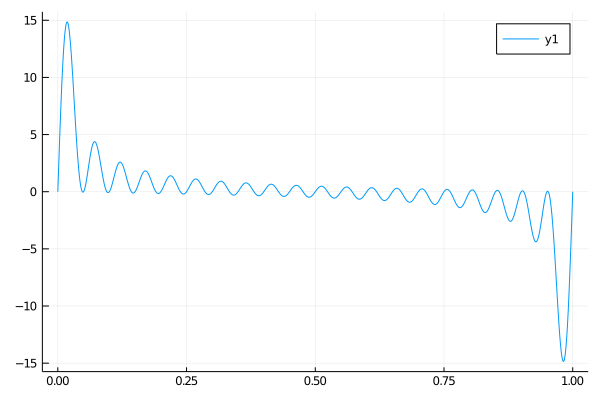

In [14]:
plot(X, f.(X))

In [16]:
@time f.(X)
@time g.(X)

  0.037972 seconds (1.20 M allocations: 18.389 MiB)
  0.002135 seconds (3 allocations: 78.344 KiB)


10001-element Array{Float64,1}:
  0.0
  0.13194506829176708
  0.26387919787105624
  0.3957914512330939
  0.5276708932883658
  0.659506592569871
  0.7912876224399282
  0.9230030622963812
  1.0546419987780549
  1.1861935269693147
  1.3176467516035766
  1.4489907882656183
  1.5802147645925482
  ⋮
 -1.4489907882656197
 -1.3176467516036379
 -1.1861935269693757
 -1.054641998778148
 -0.9230030622964815
 -0.7912876224400397
 -0.6595065925698549
 -0.5276708932883605
 -0.3957914512330888
 -0.2638791978710966
 -0.13194506829179345
 -5.854059292178984e-14

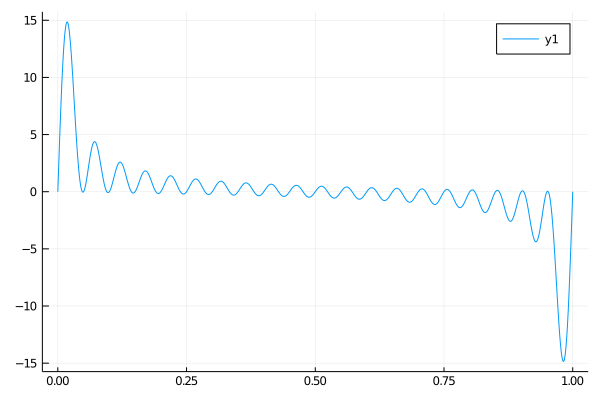

In [15]:
plot(X, g.(X))

  0.000174 seconds (1.07 k allocations: 69.133 KiB)
  0.000268 seconds (1.86 k allocations: 114.523 KiB)
  0.000212 seconds (1.47 k allocations: 86.414 KiB)
  0.000227 seconds (1.47 k allocations: 86.445 KiB)
  0.000213 seconds (1.47 k allocations: 86.367 KiB)
  0.000222 seconds (1.47 k allocations: 86.445 KiB)
  0.000231 seconds (1.47 k allocations: 86.367 KiB)
  0.000220 seconds (1.47 k allocations: 86.508 KiB)
  0.000219 seconds (1.47 k allocations: 86.367 KiB)


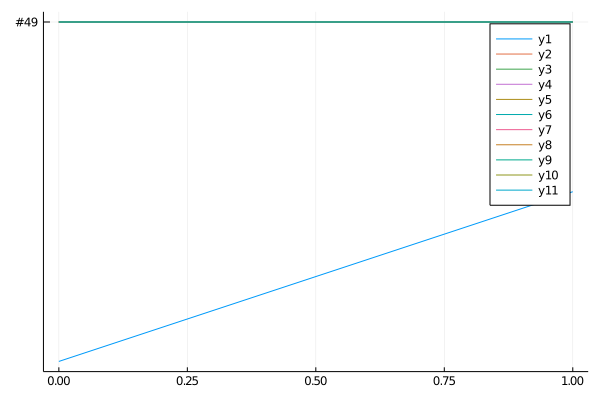

  0.000211 seconds (1.47 k allocations: 86.508 KiB)


In [60]:


f(x) = x
function test_composition(f)
    plot()
    
    g = f
    plot(g, X)
    for i in 1:10
        h(x) = x -> quadgk(x->sin(100x), 0, 1)
        g = g∘h
        @time g(2.0)
        plot!(g, X)
    end
    
    display(plot!())
end
test_composition(f)